In [11]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import math
import pylab
# from google.colab import files

In [2]:
def f1(x):
    return math.pow(np.linalg.norm(x), 2)

def f2(x):
    norm_x = np.linalg.norm(x)
    return -(1 + math.cos(12 * norm_x))/(0.5 * math.pow(norm_x, 2) + 2)

def f3(x):
    return math.pow(np.linalg.norm(x), 2)

$\textbf{Question 1.1:}$ Plot in 3D the drop-wave function $f_2$ defined above, over the domain $(x_1, x_2) \in [−5, 5]×[−5, 5]$ (the vertical axis should show the value of $f_2(x_1, x_2)$ over this domain)

X1-X2 Grid Shape:  (1001, 1001)


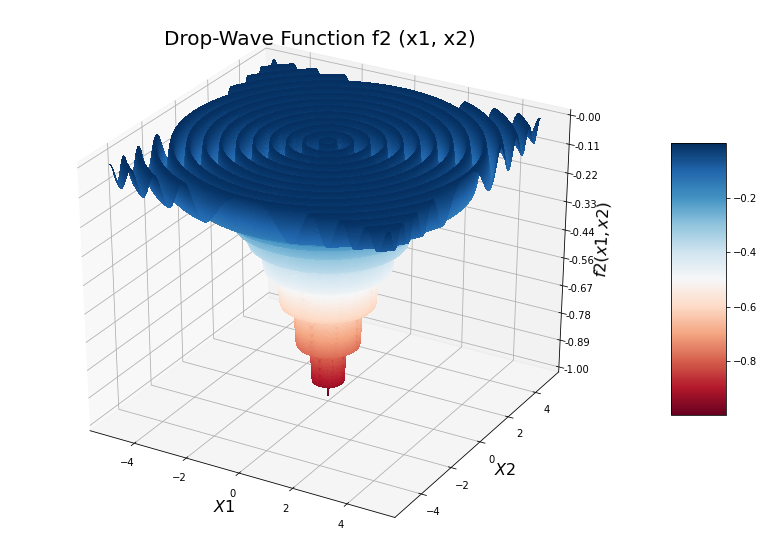

In [3]:
# Plot the drop-wave function f2
x_step = 0.01
x1_range = np.arange(-5, 5.01, x_step)
x2_range = np.arange(-5, 5.01, x_step)

X1_grid, X2_grid = pylab.meshgrid(x1_range, x2_range) # grid of point
assert(X1_grid.shape == X2_grid.shape)
print("X1-X2 Grid Shape: ", X1_grid.shape)
# print(X1_grid)
# print(X2_grid)
m, n = X1_grid.shape
F_X1_X2 = np.zeros((m,n)) # evaluation of the function on the grid

for i in range(m):
    for j in range(n):
        x = np.array([[X1_grid[i,j]], [X2_grid[i,j]]])
        F_X1_X2[i,j] = f2(x)

# print(F_X1_X2, F_X1_X2.shape)
fig = plt.figure(figsize=(14,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X1_grid, X2_grid, F_X1_X2, rstride=1, cstride=1, cmap=pylab.cm.RdBu, linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title("Drop-Wave Function f2 (x1, x2)")
ax.set_xlabel('$X1$', fontsize=16)
ax.set_ylabel('$X2$', fontsize=16)
ax.set_zlabel(r'$f2 (x1, x2)$', fontsize=16)
plt.grid(linestyle='--')
# plt.legend()
plt.show()

In [6]:
# f1 = lambda x: math.pow(np.linalg.norm(x),2)
# f2 = lambda x: -(1 + math.cos(12 * np.linalg.norm(x)))/(0.5 * pow(np.linalg.norm(x),2) + 2)
# f3 = lambda x: math.pow(np.linalg.norm(x),2)

In [17]:
parameters = {'figure.figsize':(10,6), 'axes.labelsize': 20, 'axes.titlesize': 20}
plt.rcParams.update(parameters)

In [4]:
def compute_df1_dx(x):
    n = x.shape[0]
    df1_dx = np.zeros((n,1))
    for i in range(n):
        df1_dx[i,0] = 2*x[i,0]

    return df1_dx

In [5]:
def compute_df2_dx(x):
    n = x.shape[0]
    df2_dx = np.zeros((n,1))

    term1 = np.linalg.norm(x)
    term2 = math.sin(12*term1)
    term3 = 0.5*math.pow(term1,2) + 2

    df2_dx[0,0] = ((12*x[0,0]) / term1)*(term2/term3) - (x[0,0]*f2(x)) / term3
    df2_dx[1,0] = ((12*x[1,0]) / term1)*(term2/term3) - (x[1,0]*f2(x)) / term3
    return df2_dx

In [7]:
def compute_df3_dx(x):
    n = x.shape[0]
    df3_dx = np.zeros((n,1))

    for i in range(n):
        df3_dx[i,0] = 2*x[i,0]

    return df3_dx

$\textbf{Question 1.2:}$ Perform GD with step size $\alpha = 0.01$ on the three functions. Plot how the function value changes with respect to the number of iterations (x-axis: number of iterations, y-axis: function value; same for all the following plots as well).

In [9]:
# Gradient Descent with Fixed Step size
def grad_descent(x, f, compute_df_dx, max_itr=100, alpha=1e-2):
    n = x.shape[0]
    f_val = np.zeros((max_itr+1,1))
    x_val = np.zeros((max_itr+1,n))
    
    f_val[0,0] = f(x)
    x_val[0,:] = np.reshape(x, (n))

    for i in range(max_itr):
        p = -compute_df_dx(x)
        x = x + alpha*p

        x_val[i+1,:] = np.reshape(x, (n))
        f_val[i+1,0] = f(x)
    
    return x_val, f_val

Minimum f1(x) = 0.1407 achieved at x = [0.26523911 0.26523911]


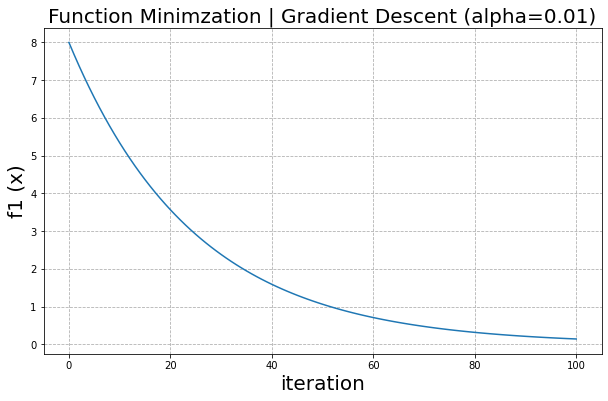

In [18]:
max_itr = 100
alpha = 1e-2
x = np.ones((2,1))*2
x_val, f1_val = grad_descent(x, f1, compute_df1_dx, max_itr, alpha)

print("Minimum f1(x) =", round(f1_val[max_itr,0], 5), "achieved at x =", x_val[max_itr,:])

fig = plt.figure()
plt.plot(range(max_itr+1), f1_val)
plt.title('Function Minimzation | Gradient Descent (alpha=0.01)')
plt.xlabel('iteration')
plt.ylabel('f1 (x)')
plt.grid(linestyle = '--')
plt.show()
# plt.savefig("GD_2_1_loss.png")

Minimum f2(x) = -0.36913  achieved at x = [1.84646292 1.84646292]


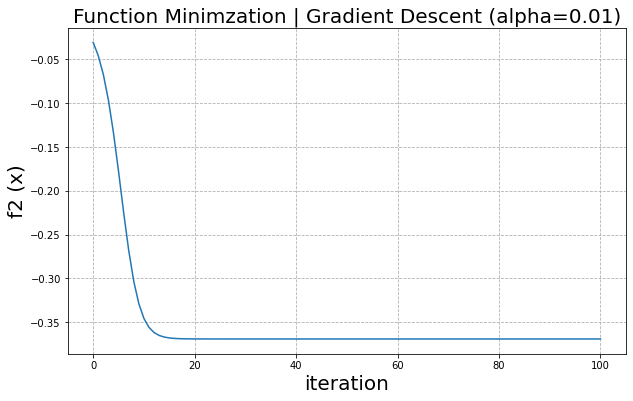

In [19]:
max_itr = 100
alpha = 1e-2
x = np.ones((2,1))*2
x_val, f2_val = grad_descent(x, f2, compute_df2_dx, max_itr, alpha)

print("Minimum f2(x) =", round(f2_val[max_itr,0], 5), " achieved at x =", x_val[max_itr,:])

fig = plt.figure()
plt.plot(range(max_itr+1), f2_val)
plt.title('Function Minimzation | Gradient Descent (alpha=0.01)')
plt.xlabel('iteration')
plt.ylabel('f2 (x)')
plt.grid(linestyle = '--')
plt.show()
# plt.savefig("GD_2_1_loss.png")

Minimum f3(x) = 3.51759  achieved at x = [0.26523911 0.26523911 0.26523911 0.26523911 0.26523911 0.26523911
 0.26523911 0.26523911 0.26523911 0.26523911 0.26523911 0.26523911
 0.26523911 0.26523911 0.26523911 0.26523911 0.26523911 0.26523911
 0.26523911 0.26523911 0.26523911 0.26523911 0.26523911 0.26523911
 0.26523911 0.26523911 0.26523911 0.26523911 0.26523911 0.26523911
 0.26523911 0.26523911 0.26523911 0.26523911 0.26523911 0.26523911
 0.26523911 0.26523911 0.26523911 0.26523911 0.26523911 0.26523911
 0.26523911 0.26523911 0.26523911 0.26523911 0.26523911 0.26523911
 0.26523911 0.26523911]


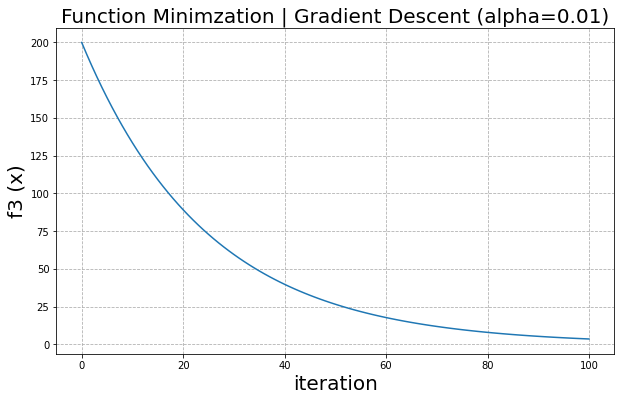

In [20]:
max_itr = 100
alpha = 1e-2
x = np.ones((50,1))*2
x_val, f3_val = grad_descent(x, f3, compute_df3_dx, max_itr, alpha)

print("Minimum f3(x) =", round(f3_val[max_itr,0], 5), " achieved at x =", x_val[max_itr,:])

fig = plt.figure()
plt.plot(range(max_itr+1), f3_val)
plt.title('Function Minimzation | Gradient Descent (alpha=0.01)')
plt.xlabel('iteration')
plt.ylabel('f3 (x)')
plt.grid(linestyle = '--')
plt.show()
# plt.savefig("GD_2_1_loss.png")

$\textbf{Question 1.3:}$ Perform SA with two different initial temperatures T = 1000 and T = 10, for each function. Plot how the function values changes over iterations. Overall 3 functions and 2 different temperatures, so 6 graphs in total. Because the algorithm is stochastic, for each function and each temperature, plot 5 different runs (i.e. 5 different random seeds of your choice) in the same graph. That is, start at the same initial point, and since each step will be stochastic, you should plot 5 different trajectories for each function (i.e., 5 sequences of points in each of the 6 plots requested, use a different color for each sequence). This requirement is the same for the following two algorithms as well.

In [30]:
# Simulated Annealing Function
def simulated_annealing(x, f, max_itr=100, init_T=1000, seed_val=1):
    # np.random.seed(seed_val)
    n = x.shape[0]
    f_val = np.zeros((max_itr+1,1))
    x_val = np.zeros((max_itr+1,n))

    f_val[0,0] = f(x)
    x_val[0,:] = np.reshape(x, (n))
    
    dx_mean = np.zeros((n))
    dx_cov = np.eye(n)

    for i in range(max_itr):
        dx = np.random.multivariate_normal(dx_mean, dx_cov).reshape((n,1))
        new_x = x + dx
        delta_fx = f(new_x) - f(x)

        if (delta_fx >= 0):
            T = init_T/(i+1)
            prob_accept = math.exp(-delta_fx/T)
            if prob_accept >= 0.5:
                x = new_x
        else:
            x = new_x
        
        x_val[i+1,:] = np.reshape(x, (n))
        f_val[i+1,0] = f(x)
    
    return x_val, f_val

Minimum f1(x) = 18.74983 achieved at x = [-2.64076457  3.43164598]  for T = 1000
Minimum f1(x) = 17.90776 achieved at x = [ 3.96257354 -1.48518226]  for T = 1000
Minimum f1(x) = 9.60935 achieved at x = [2.9478939  0.95878866]  for T = 1000
Minimum f1(x) = 17.45158 achieved at x = [1.95056259 3.69416912]  for T = 1000
Minimum f1(x) = 1.44403 achieved at x = [-0.95261952  0.73249318]  for T = 1000


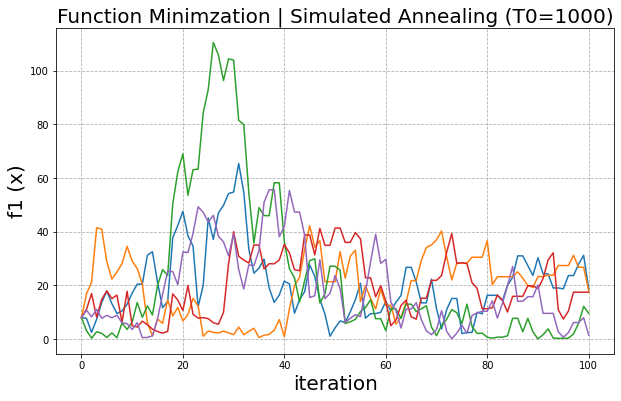

Minimum f1(x) = 0.18469 achieved at x = [-0.09180763  0.41983702]  for T = 10
Minimum f1(x) = 0.11411 achieved at x = [0.31153548 0.13058416]  for T = 10
Minimum f1(x) = 0.05948 achieved at x = [ 0.1950825  -0.14637554]  for T = 10
Minimum f1(x) = 0.0755 achieved at x = [0.15897298 0.22411945]  for T = 10
Minimum f1(x) = 0.19615 achieved at x = [-0.332542    0.29251959]  for T = 10


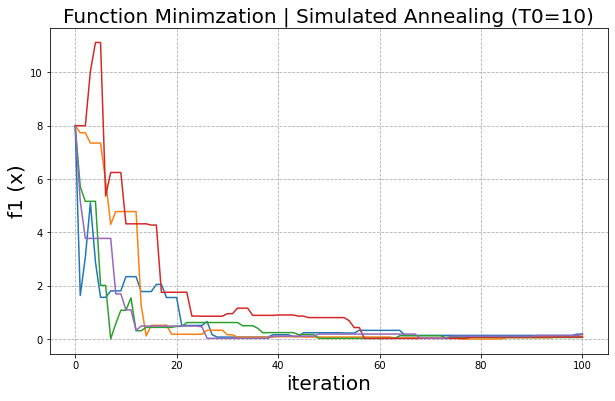

In [32]:
# SA for f1
init_temp_lst = [1000, 10]

for init_temp in init_temp_lst:
    fig = plt.figure()
    seed_val = [1,2,3,4,5]
    num_runs = 5
    
    for run in range(num_runs):
        max_itr = 100
        x = np.ones((2,1))*2
        x_val, f1_val = simulated_annealing(x, f1, max_itr, init_temp, seed_val[run])

        print("Minimum f1(x) =", round(f1_val[max_itr,0], 5), "achieved at x =", x_val[max_itr,:], " for T =", init_temp)
        plt.plot(range(max_itr+1), f1_val)

    plt.title('Function Minimzation | Simulated Annealing (T0='+str(init_temp)+')')
    plt.xlabel('iteration')
    plt.ylabel('f1 (x)')
    plt.grid(linestyle = '--')
    # plt.legend()
    plt.show()
    # plt.savefig("GD_2_1_loss.png")

Minimum f2(x) =  -0.04938  achieved at x =  [6.99397285 4.51615881]  for T= 1000
Minimum f2(x) =  -0.00305  achieved at x =  [-21.28094935  -6.1173565 ]  for T= 1000
Minimum f2(x) =  -0.00346  achieved at x =  [7.05484784 4.09531046]  for T= 1000
Minimum f2(x) =  -0.00779  achieved at x =  [ 11.51446785 -13.71930505]  for T= 1000
Minimum f2(x) =  -0.00183  achieved at x =  [ 7.81645624 17.51747634]  for T= 1000


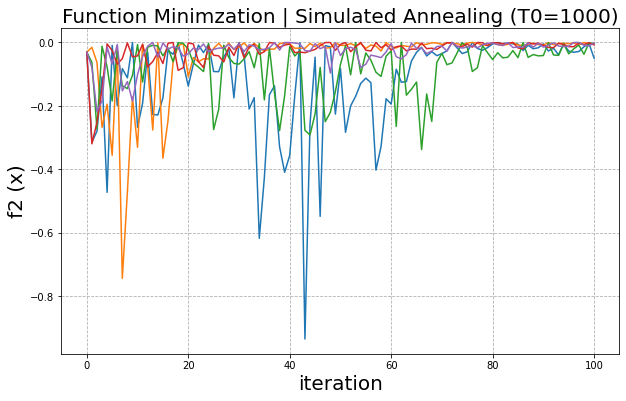

Minimum f2(x) =  -0.7782  achieved at x =  [ 0.43543221 -0.96408892]  for T= 10
Minimum f2(x) =  -0.7829  achieved at x =  [-1.03018421  0.05177686]  for T= 10
Minimum f2(x) =  -0.00075  achieved at x =  [ 2.39963122 -9.89976287]  for T= 10
Minimum f2(x) =  -0.53519  achieved at x =  [0.48110134 0.4212081 ]  for T= 10
Minimum f2(x) =  -0.92265  achieved at x =  [-0.0671658   0.49562803]  for T= 10


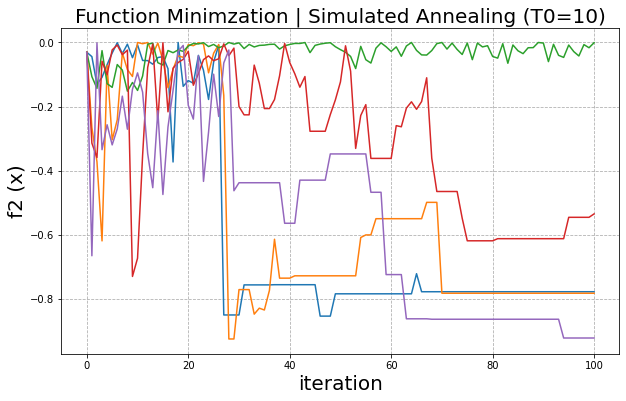

In [35]:
# SA for f2
init_temp_lst = [1000, 10]

for init_temp in init_temp_lst:
    fig = plt.figure()
    seed_val = [1,2,3,4,5]
    num_runs = 5

    for run in range(num_runs):
        max_itr = 100
        x = np.ones((2,1))*2

        x_val, f2_val = simulated_annealing(x, f2, max_itr, init_temp, seed_val[run])

        print("Minimum f2(x) = ", round(f2_val[max_itr,0], 5), " achieved at x = ", x_val[max_itr,:], " for T=", init_temp)
        plt.plot(range(max_itr+1), f2_val)

    plt.title('Function Minimzation | Simulated Annealing (T0='+str(init_temp)+')')
    plt.xlabel('iteration')
    plt.ylabel('f2 (x)')
    plt.grid(linestyle = '--')
    # plt.legend()
    plt.show()
    # plt.savefig("GD_2_1_loss.png")

Minimum f3(x) =  356.66973  achieved at x =  [-0.98295245 -3.43299076 -4.52568177  0.10861091 -3.76052004  3.47604528
 -1.32451709 -3.07943833 -1.27482712 -3.07959755  0.70344594  2.80591002
  2.00893862 -0.99524251  1.80664292 -3.10465526  2.20470423 -3.71521286
 -3.54271841  0.92125323  3.96127466 -0.23121954 -0.78778903 -0.37568652
  1.68956407 -1.68454979  0.76659693  0.84325436 -2.40629965 -1.40730364
  4.39509582  1.53053898  2.36680601  2.76374017  1.96537147  0.15768428
 -0.0135786   3.28221425  6.72512312 -1.96568259  4.42829315 -3.67502716
  1.08017751 -2.70283874  2.9500736   4.3542191   0.04222725 -0.7404826
  2.21078778 -3.44758503]
Minimum f3(x) =  355.33478  achieved at x =  [ 0.6643464  -1.25335965 -2.84989685  1.75345705  2.38635062  4.45425547
 -1.05676172  0.92062146  0.16880908  3.61648965 -1.61675908  0.47643814
  5.49971882 -3.68727763 -0.11995389 -3.33343077 -0.99370497  5.95840654
  5.01962087 -0.70592526  0.07851107  1.59771741  1.85737713  2.28374098
  0.06494

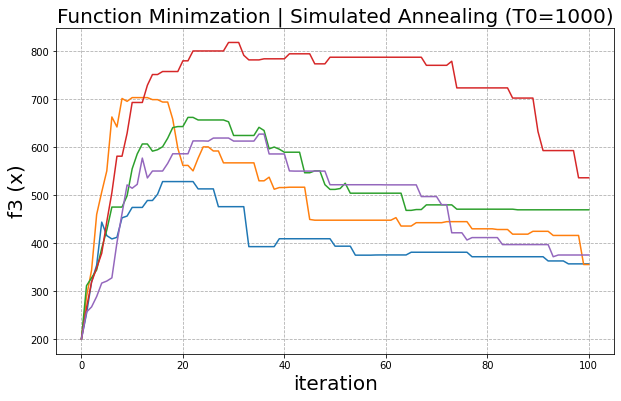

Minimum f3(x) =  199.99936  achieved at x =  [1.38190298 2.45105914 1.65731257 2.44894239 1.96343682 1.01233219
 0.86341176 2.5395425  2.18734357 1.62229689 2.5009853  1.14817123
 2.03120185 3.18153259 3.85795532 1.09289703 2.39556336 1.57478324
 2.40206458 1.85689849 3.68078791 1.0749938  1.70053595 3.92481288
 1.17519537 1.30557648 1.11542118 1.09939317 1.70134292 0.54174573
 1.50859506 0.93932784 1.93087225 1.37829765 1.92235853 3.0525717
 2.08373019 1.84294509 1.73279572 2.8307135  0.56937404 1.24207155
 2.17799445 1.00873847 1.1987885  1.09058894 3.3097515  1.15970345
 1.52297574 1.16513173]
Minimum f3(x) =  131.79148  achieved at x =  [-0.21533854 -0.09240056 -1.05704635  1.92685012  0.26049592  0.71699287
  1.74645219  0.1654867  -0.89675077  2.82839102  0.27234449 -0.72254786
  0.83685072  2.71993375  2.13257086  0.16729279  2.00556279  0.7632107
  1.83458258  2.34270763  0.34789879 -1.65240359  2.60358216 -0.14049433
  1.88990606 -0.42805909 -0.63132551  2.68278947  1.91444196

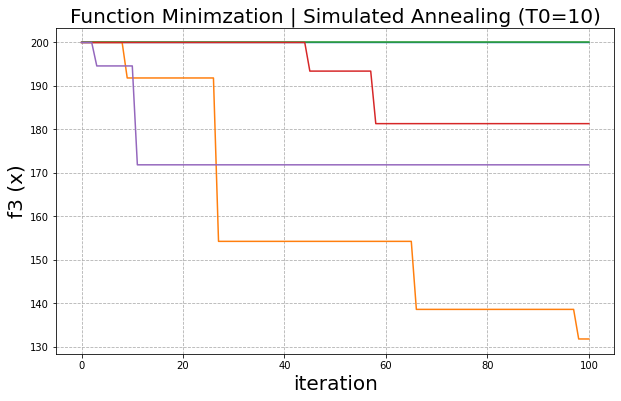

In [36]:
# SA for f3
init_temp_lst = [1000, 10]

for init_temp in init_temp_lst:
    fig = plt.figure()
    seed_val = [1,2,3,4,5]
    num_runs = 5

    for run in range(num_runs):
        max_itr = 100
        x = np.ones((50,1))*2

        x_val, f3_val = simulated_annealing(x, f3, max_itr, init_temp, seed_val[run])

        print("Minimum f3(x) = ", round(f3_val[max_itr,0], 5), " achieved at x = ", x_val[max_itr,:])
        plt.plot(range(max_itr+1), f3_val)

    plt.title('Function Minimzation | Simulated Annealing (T0='+str(init_temp)+')')
    plt.xlabel('iteration')
    plt.ylabel('f3 (x)')
    plt.grid(linestyle = '--')
    # plt.legend()
    plt.show()
    # plt.savefig("GD_2_1_loss.png")

$\textbf{Question 1.4:}$ Perform CE with two sample sizes, k = 10 and k = 50, for each function. Perform 5 runs for each function and each sample size. Plot the average of the function values of all samples in each iteration for each function. Overall 6 plots (each plot should show 5 random trajectories).

In [38]:
# Cross-Entropy Method
def cross_entropy(x, f, max_itr=100, sample_size=10, elite_frac=0.2):
    n = x.shape[0]
    f_val = np.zeros((max_itr+1,1))
    x_val = np.zeros((max_itr+1,n))

    f_val[0,0] = f(x)
    x_val[0,:] = x.reshape(n)

    elite_mean = np.zeros((n,1)) + x
    elite_mean = elite_mean.reshape(n)
    elite_cov = np.eye(n)
    elite_sample_size = int(elite_frac * sample_size)

    for i in range(max_itr):
        x_samples = np.random.multivariate_normal(elite_mean, elite_cov, size=(sample_size))

        f_val_sample = np.zeros(sample_size)
        for j in range(sample_size):
            f_val_sample[j] = f(np.reshape(x_samples[j,:], (n,1)))
        
        sort_index = np.argsort(f_val_sample, axis=0)
        elite_samples = x_samples[sort_index[0:elite_sample_size], :]

        elite_mean = np.mean(elite_samples, axis=0)
        elite_cov = np.cov(elite_samples, rowvar=False)

        # f_val[i+1,0] = f(elite_mean.reshape(n,1))
        f_val[i+1,0] = np.mean(f_val_sample)
        x_val[i+1,:] = elite_mean

    return x_val, f_val

Minimum f1(x) = 5.45131  achieved at x = [1.35521965 1.90123378]  for sample K = 10
Minimum f1(x) = 1.34232  achieved at x = [0.89588586 0.73464804]  for sample K = 10
Minimum f1(x) = 2.83752  achieved at x = [1.43938653 0.87503403]  for sample K = 10
Minimum f1(x) = 2.67646  achieved at x = [1.28751706 1.00933873]  for sample K = 10
Minimum f1(x) = 1.82611  achieved at x = [1.19747349 0.62622999]  for sample K = 10


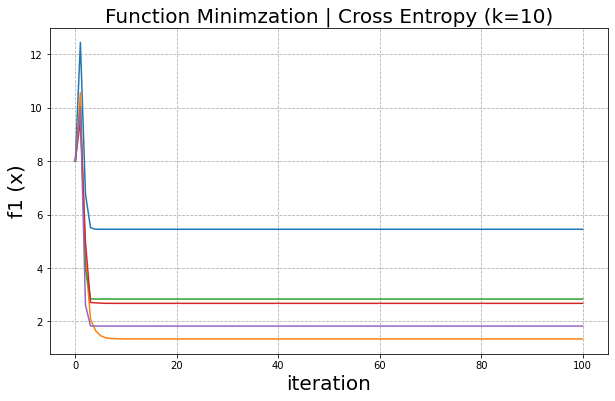

Minimum f1(x) = 0.36943  achieved at x = [0.3726456  0.48017723]  for sample K = 50
Minimum f1(x) = 0.0  achieved at x = [-4.29401339e-32 -1.88180761e-33]  for sample K = 50
Minimum f1(x) = 0.59226  achieved at x = [0.41109569 0.65058402]  for sample K = 50
Minimum f1(x) = 0.29865  achieved at x = [0.1984778  0.50917071]  for sample K = 50
Minimum f1(x) = 0.73335  achieved at x = [0.65748811 0.54868698]  for sample K = 50


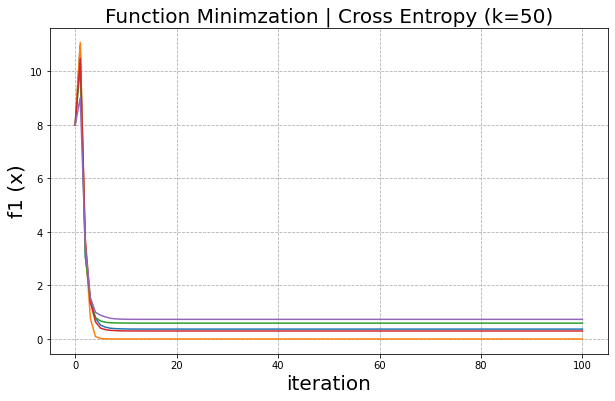

In [39]:
# Cross-Entropy for f1(x)
sample_size_lst = [10, 50]

for sample_size in sample_size_lst:
    fig = plt.figure()
    num_runs = 5
    for run in range(num_runs):
        max_itr = 100
        x = np.ones((2,1))*2
        x_val, f1_val = cross_entropy(x, f1, max_itr, sample_size)

        print("Minimum f1(x) =", round(f1_val[max_itr,0], 5), " achieved at x =", x_val[max_itr,:], " for sample K =", sample_size)
        plt.plot(range(max_itr+1), f1_val)

    plt.title('Function Minimzation | Cross Entropy (k='+str(sample_size)+')')
    plt.xlabel('iteration')
    plt.ylabel('f1 (x)')
    plt.grid(linestyle = '--')
    # plt.legend()
    plt.show()

Minimum f2(x) = -0.47778  achieved at x = [0.66209408 1.97996539]  for sample K = 10
Minimum f2(x) = -0.36913  achieved at x = [2.37658883 1.0819374 ]  for sample K = 10
Minimum f2(x) = -0.6195  achieved at x = [-1.54687495 -0.23122102]  for sample K = 10
Minimum f2(x) = -0.36367  achieved at x = [2.07928434 1.5459393 ]  for sample K = 10
Minimum f2(x) = -0.43533  achieved at x = [-0.04234957  2.13766222]  for sample K = 10


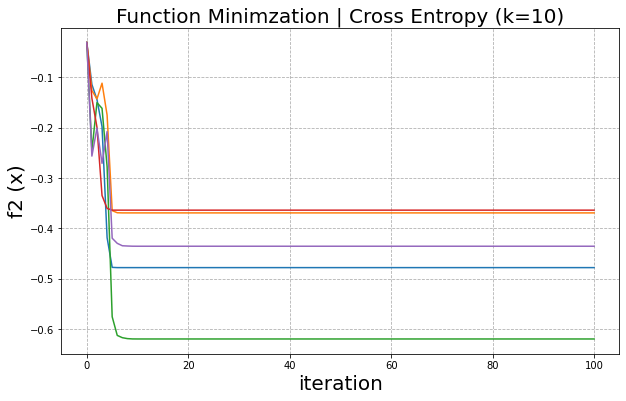

Minimum f2(x) = -0.93625  achieved at x = [0.43250623 0.28907195]  for sample K = 50
Minimum f2(x) = -0.47778  achieved at x = [1.40423923 1.54454061]  for sample K = 50
Minimum f2(x) = -0.78575  achieved at x = [0.78661526 0.68262696]  for sample K = 50
Minimum f2(x) = -0.6195  achieved at x = [0.51508901 1.47681003]  for sample K = 50
Minimum f2(x) = -0.6195  achieved at x = [0.82468692 1.32897556]  for sample K = 50


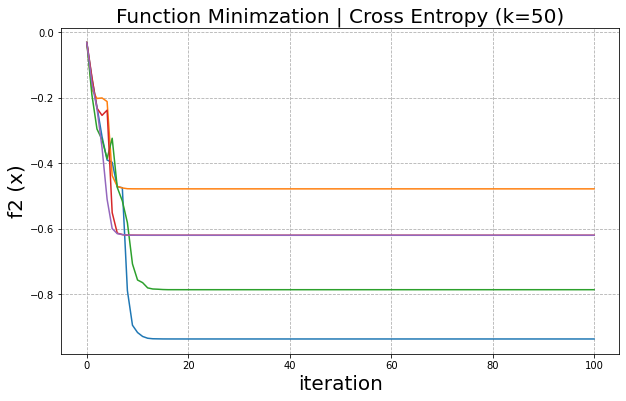

In [41]:
# Cross-Entropy for f2(x)
sample_size_lst = [10, 50]

for sample_size in sample_size_lst:
    fig = plt.figure()
    num_runs = 5
    for run in range(num_runs):
        max_itr = 100
        x = np.ones((2,1))*2
        x_val, f2_val = cross_entropy(x, f2, max_itr, sample_size)

        print("Minimum f2(x) =", round(f2_val[max_itr,0], 5), " achieved at x =", x_val[max_itr,:], " for sample K =", sample_size)
        plt.plot(range(max_itr+1), f2_val)

    plt.title('Function Minimzation | Cross Entropy (k='+str(sample_size)+')')
    plt.xlabel('iteration')
    plt.ylabel('f2 (x)')
    plt.grid(linestyle = '--')
    # plt.legend()
    plt.show()

Minimum f3(x) = 177.41878  achieved at x = [0.65731265 1.33449839 1.40330609 1.59204474 2.05571709 1.99928727
 1.94574693 2.22665074 0.88430474 2.55878073 2.11062558 2.28767047
 1.38629453 1.40837195 0.14357411 1.06746918 2.10442969 1.5502938
 1.85529806 0.95002385 1.55865435 1.19187347 1.40079941 1.85384649
 2.68835374 1.82676173 1.08460009 2.55767387 2.55128796 2.48185649
 1.40010547 2.00663591 1.5136292  2.32728583 0.83185115 1.28821296
 0.89202651 1.72888695 1.50978723 2.04084071 1.37610911 2.69249967
 2.46416066 1.40007859 1.93736282 3.70629402 2.47779058 2.28062921
 2.20803035 1.76598208]
Minimum f3(x) = 184.50663  achieved at x = [ 1.15614235  1.40629207  1.37741408  0.80231881  1.50516479  2.94435442
  1.03201195  1.92147207  1.34739311  1.32810787  2.5533453   1.64874943
  2.04776961  1.48894899  1.73590708  2.25371964  1.58792765  2.13135712
  1.35165144  1.68094695  1.09150787  2.114235    0.76154196  1.99858621
  2.96541717  1.34888904 -0.04399091  2.86398376  2.40417555  1

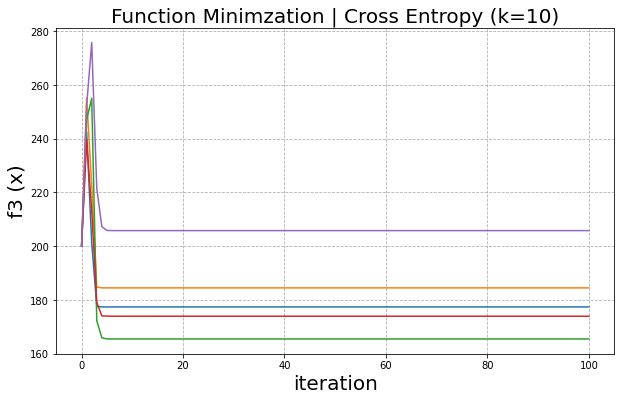

Minimum f3(x) = 167.25786  achieved at x = [2.1734146  1.78417892 1.60350888 2.62714471 1.56238379 0.69708094
 1.39209693 1.68245042 1.62788922 0.95250815 1.44809306 1.87183768
 2.38286444 1.2824333  2.00692979 1.6832918  1.95374378 1.99239786
 1.13719286 1.44509768 2.26790033 1.73639814 1.3251136  1.43759851
 1.53234257 2.67291654 2.98738525 1.20360121 1.74021718 2.0369728
 2.12495512 2.11742221 1.18340519 1.8270383  1.93335359 1.53499652
 2.03059325 1.98458381 1.19209617 1.54210962 1.39979417 2.215417
 1.64641344 1.96732913 1.63853918 2.16446201 1.89496123 2.35988467
 1.79110296 1.94132439]
Minimum f3(x) = 162.33038  achieved at x = [1.98932245 0.72555091 1.65414654 0.90100233 1.85740269 0.65470607
 1.42188283 1.30287564 2.38329086 1.26187722 2.0017334  1.65883145
 2.02497443 0.75606293 1.3965972  2.15764366 1.99570734 1.02392771
 1.86557226 2.36836136 1.68604174 1.12676235 1.95496296 2.99300981
 2.27001657 1.3741507  1.494396   1.73176397 1.3078968  2.36650585
 1.18685939 1.1594144 

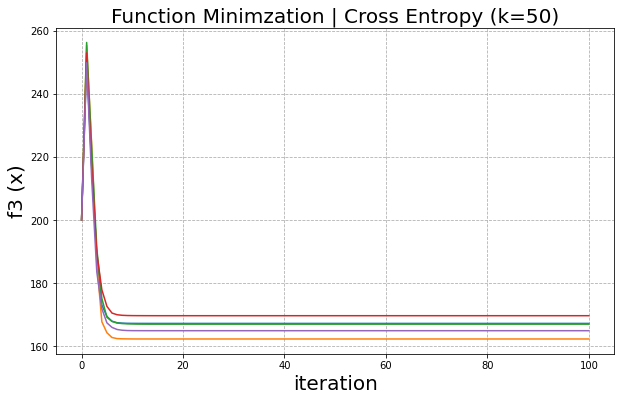

In [42]:
# Cross-Entropy for f3(x)
sample_size_lst = [10, 50]

for sample_size in sample_size_lst:
    fig = plt.figure()
    num_runs = 5
    for run in range(num_runs):
        max_itr = 100
        x = np.ones((50,1))*2
        x_val, f3_val = cross_entropy(x, f3, max_itr, sample_size)

        print("Minimum f3(x) =", round(f3_val[max_itr,0], 5), " achieved at x =", x_val[max_itr,:])
        plt.plot(range(max_itr+1), f3_val)

    plt.title('Function Minimzation | Cross Entropy (k='+str(sample_size)+')')
    plt.xlabel('iteration')
    plt.ylabel('f3 (x)')
    plt.grid(linestyle = '--')
    # plt.legend()
    plt.show()

$\textbf{Question 1.5:}$ Perform SG with two sample sizes, k = 10 and k = 50, for each function. Perform 5 runs for each function and each sample size. Plot the average of the function values of all in each iteration for each function. Overall 6 plots (each plot should show 5 random trajectories). Note: If you see the gradient update diverging (leading to very large values), you can use the normalized gradient $\frac{\nabla f(x)}{\|\nabla f(x)\|_2}$ in each update instead of just $\nabla f(x)$ (so that after multiplying with the learning rate, each update step is guaranteed to be small in magnitude), but you don’t have to do this and you can just show the divergence behavior as well.

In [46]:
# Search Gradient
def search_gradient(x, f, max_itr=100, alpha=1e-2, sample_size=10):
    n = x.shape[0]
    f_val = np.zeros((max_itr+1,1))
    x_val = np.zeros((max_itr+1,n))

    f_val[0,0] = f(x)
    x_val[0,:] = x.reshape(n)

    x_mean = np.zeros((n,1)) + x
    x_cov = np.eye(n)

    i = 0
    while i < max_itr:
        x_samples = np.random.multivariate_normal(x_mean.reshape(n), x_cov, size=(sample_size))

        f_val_sample = np.zeros(sample_size)

        x_cov_inv = np.linalg.inv(x_cov)

        sum_grad_mean = np.zeros((n,1))
        sum_grad_cov = np.zeros((n,n))

        for j in range(sample_size):
            x_sample = np.reshape(x_samples[j,:], (n,1))
            f_val_sample[j] = f(x_sample)

            term0 = x_sample - x_mean
            grad_mean_log_prob = np.matmul(x_cov_inv, term0)

            term1 = np.matmul(term0, term0.T)
            grad_cov_log_prob = -0.5*x_cov_inv + 0.5*np.matmul(np.matmul(x_cov_inv, term1), x_cov_inv)

            sum_grad_mean = sum_grad_mean + grad_mean_log_prob * f_val_sample[j]
            sum_grad_cov = sum_grad_cov + grad_cov_log_prob * f_val_sample[j]
        
        avg_grad_mean = sum_grad_mean / sample_size
        avg_grad_cov = sum_grad_cov / sample_size

        # x_mean = x_mean - alpha * avg_grad_mean
        # x_cov = x_cov - alpha * avg_grad_cov

        x_mean = x_mean - alpha * avg_grad_mean / np.linalg.norm(avg_grad_mean)
        x_cov = x_cov - alpha * avg_grad_cov / np.linalg.norm(avg_grad_cov)

        f_val[i+1,0] = np.mean(f_val_sample)
        x_val[i+1,:] = x_mean.reshape(n)

        i = i+1
    
    return x_val, f_val

Minimum f1(x) = 6.94584  achieved at x = [1.48344689 1.48256931] for sample K =  10
Minimum f1(x) = 7.48176  achieved at x = [1.48766152 1.48835024] for sample K =  10
Minimum f1(x) = 4.15254  achieved at x = [1.45343188 1.52843913] for sample K =  10
Minimum f1(x) = 6.82201  achieved at x = [1.49230278 1.48675488] for sample K =  10
Minimum f1(x) = 7.50071  achieved at x = [1.55201341 1.43176069] for sample K =  10


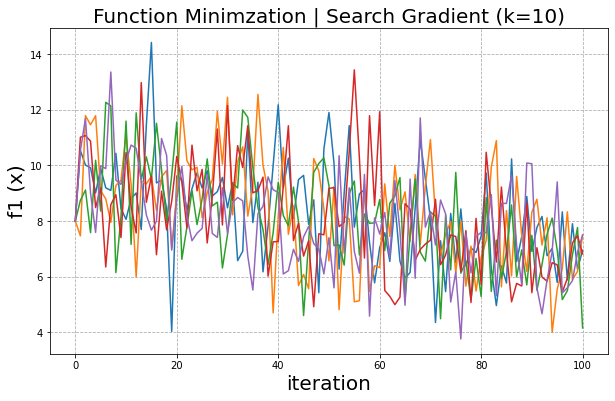

Minimum f1(x) = 4.26101  achieved at x = [1.33666092 1.3174997 ] for sample K =  50
Minimum f1(x) = 4.79825  achieved at x = [1.31890165 1.3462616 ] for sample K =  50
Minimum f1(x) = 4.87649  achieved at x = [1.30881772 1.34054485] for sample K =  50
Minimum f1(x) = 4.73295  achieved at x = [1.35397537 1.34825937] for sample K =  50
Minimum f1(x) = 5.95958  achieved at x = [1.3386613  1.32273145] for sample K =  50


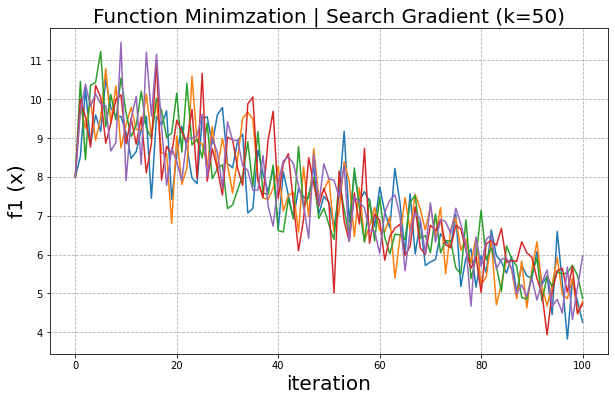

In [48]:
# Search Gradient for f1(x)
sample_size_lst = [10, 50]

for sample_size in sample_size_lst:
    fig = plt.figure()
    num_runs = 5
    for run in range(num_runs):
        max_itr = 100
        alpha = 1e-2
        x = np.ones((2,1))*2
        x_val, f1_val = search_gradient(x, f1, max_itr, alpha, sample_size)

        print("Minimum f1(x) =", round(f1_val[max_itr,0], 5), " achieved at x =", x_val[max_itr,:], "for sample K = ", sample_size)
        plt.plot(range(max_itr+1), f1_val)

    plt.title('Function Minimzation | Search Gradient (k='+str(sample_size)+')')
    plt.xlabel('iteration')
    plt.ylabel('f1 (x)')
    plt.grid(linestyle = '--')
    # plt.legend()
    plt.show()

Minimum f2(x) = -0.3299  achieved at x = [1.71837125 1.57490994] for sample K =  10
Minimum f2(x) = -0.22437  achieved at x = [1.60419381 1.60172484] for sample K =  10
Minimum f2(x) = -0.13864  achieved at x = [1.70156977 1.64593567] for sample K =  10
Minimum f2(x) = -0.26169  achieved at x = [1.66843345 1.67275641] for sample K =  10
Minimum f2(x) = -0.26055  achieved at x = [1.68174541 1.71504184] for sample K =  10


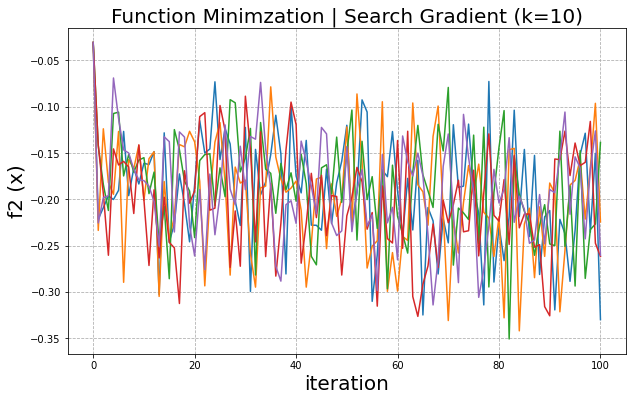

Minimum f2(x) = -0.28602  achieved at x = [1.37202753 1.36544579] for sample K =  50
Minimum f2(x) = -0.26834  achieved at x = [1.44743191 1.38699145] for sample K =  50
Minimum f2(x) = -0.2193  achieved at x = [1.43512879 1.38078511] for sample K =  50
Minimum f2(x) = -0.20658  achieved at x = [1.3734341  1.41802188] for sample K =  50
Minimum f2(x) = -0.2389  achieved at x = [1.37035065 1.43914808] for sample K =  50


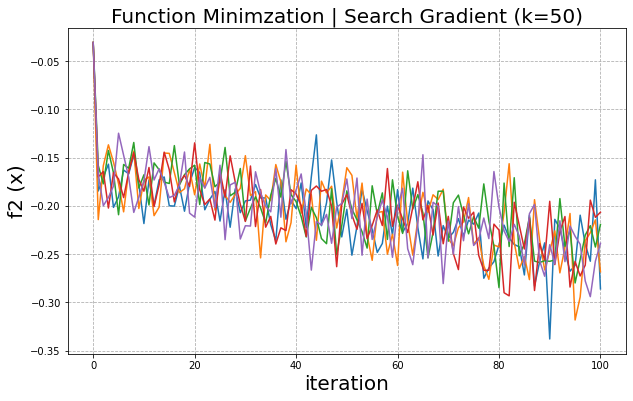

In [49]:
# Search Gradient for f2(x)
sample_size_lst = [10, 50]

for sample_size in sample_size_lst:
    fig = plt.figure()
    num_runs = 5
    for run in range(num_runs):
        max_itr = 100
        alpha = 1e-2
        x = np.ones((2,1))*2
        x_val, f2_val = search_gradient(x, f2, max_itr, alpha, sample_size)

        print("Minimum f2(x) =", round(f2_val[max_itr,0], 5), " achieved at x =", x_val[max_itr,:], "for sample K = ", sample_size)
        plt.plot(range(max_itr+1), f2_val)

    plt.title('Function Minimzation | Search Gradient (k='+str(sample_size)+')')
    plt.xlabel('iteration')
    plt.ylabel('f2 (x)')
    plt.grid(linestyle = '--')
    # plt.legend()
    plt.show()

Minimum f3(x) = 259.20551  achieved at x = [1.99950174 1.98097569 2.01366563 2.00528528 2.01358678 2.01694479
 1.99331778 1.97406474 1.99698797 2.01483631 1.99447338 2.00080464
 1.98066    1.99580145 1.98659856 1.97772305 2.00735347 1.98196328
 1.99122544 1.97711868 1.99275782 1.97194613 2.00448674 1.97420492
 1.9872727  2.00182175 2.01254717 1.98301133 1.99854829 1.99813451
 2.00248956 1.99496205 1.98877314 1.99070522 1.98097995 2.02336367
 2.00860241 1.98321315 1.98767981 1.97874684 1.99829187 1.94833243
 1.9726905  1.98463684 2.0098373  2.00958261 1.99066422 2.0002155
 1.98874447 1.99017329]
Minimum f3(x) = 261.65771  achieved at x = [2.01806225 2.00835307 1.97049603 2.00204639 1.99497025 1.98836377
 1.98536605 1.9834054  1.98171479 1.97595565 1.98325893 1.9920094
 1.97906803 2.00716064 1.98013194 1.99272906 2.02170444 2.00242018
 1.98347848 1.9936883  2.02640707 1.98764785 1.99945107 1.98962571
 1.96471981 2.00884158 1.98086184 1.983111   1.99469815 2.00788601
 2.01470537 2.0041889

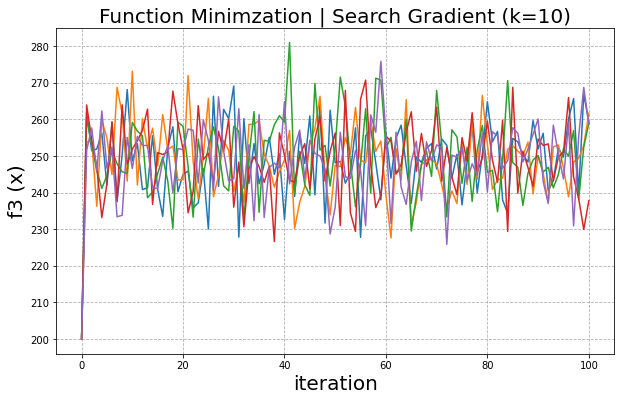

Minimum f3(x) = 242.733  achieved at x = [1.99652663 1.9917651  1.98355186 1.99371003 1.99003276 1.97022334
 1.99619319 1.97785205 1.97773479 1.99917238 2.00422    2.00964696
 1.99286033 1.97165351 1.97238777 1.98088988 2.01322003 1.97397618
 1.99641408 1.97792992 1.99180849 1.97916313 1.97994293 1.96853359
 2.01016434 1.97643304 2.006377   1.98024949 1.99228229 2.00792702
 1.96863248 1.99394603 1.98570451 1.98471488 1.98695565 1.98235748
 1.97895914 2.00329865 2.00509134 1.97669394 2.00156292 1.98815779
 1.98084779 1.97473043 1.97944216 1.98633819 2.00471112 1.97838663
 1.98320968 1.97775158]
Minimum f3(x) = 246.46605  achieved at x = [1.97602288 2.00074517 1.98735664 1.98283891 1.98966927 1.97560167
 2.00440438 1.97166067 1.99254989 1.98070689 1.96378036 1.98457696
 1.98974432 1.98329363 1.94533432 1.99846982 2.01622555 1.99064625
 1.99343377 1.99664998 1.98389072 1.9934411  1.99526044 1.99610102
 1.95470293 1.98510956 1.99630195 1.99962872 1.96878487 1.96210208
 1.96977349 1.9768728

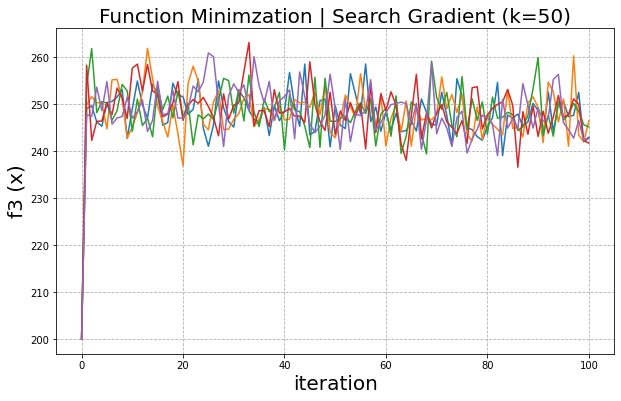

In [50]:
# Search Gradient for f3(x)
sample_size_lst = [10, 50]

for sample_size in sample_size_lst:
    fig = plt.figure()
    num_runs = 5
    for run in range(num_runs):
        max_itr = 100
        alpha = 1e-2
        x = np.ones((50,1))*2
        x_val, f3_val = search_gradient(x, f3, max_itr, alpha, sample_size)

        print("Minimum f3(x) =", round(f3_val[max_itr,0], 5), " achieved at x =", x_val[max_itr,:])
        plt.plot(range(max_itr+1), f3_val)

    plt.title('Function Minimzation | Search Gradient (k='+str(sample_size)+')')
    plt.xlabel('iteration')
    plt.ylabel('f3 (x)')
    plt.grid(linestyle = '--')
    # plt.legend()
    plt.show()

$\textbf{Question 1.6:}$ Based on the performance of these algorithms with different parameters on different types of functions, summarize some intuition about how to choose among these algorithms and the parameters. For instance, when the function dimension is large, is it better to sample or find gradient? What are the different trends of the algorithms for different sample sizes? Do some algorithms give more stable behavior than others? There is no standard answer here, just reflect a bit on how you should choose from the different strategies.

$\textbf{Answer: }$
Functions $f_1(x_1, x_2)$ and $f_3(x)$ are both convex functions of similar nature but in different dimensional space (N = 2 and N = 50 resp.). Therefore, as evident from the gradient descent minimization plots of these two functions, they follow similar behaviour. For example, the gradient descent minimization for $f_1$ and $f_3$ follow the same curve over 100 iterations except for the function values due to extra dimensions in $f_3$. <br> <br>
In simulated annealing, a random $\Delta x$ is being sampled from a normal distribution $\mathcal{N}(0,I)$ at each iteration, and based on function values at $x + \Delta x$ and acceptance probability, the value of $x$ is updated to the new value $x + \Delta x$. From the plots of simulated annealing, we can infer that $T=10$ performs better compared to $T=1000$ (probabilistically) in most cases. This can be understood in terms of acceptance probability. 
\begin{equation}
    P(\text{accept} | f(x+\Delta x) > f(x)) = \exp{(-\frac{f(x+\Delta x) - f(x)}{T})}
\end{equation}
For the same value of $(f(x+\Delta x) - f(x))$, higher values of T leads to greater probability of accepting higher function values at $x+\Delta x$ compared to lower values of T. In simulated annealing, acceptance of higher function values can be seen as exploration. This can lead to divergence and larger number of iterations to converge to the minimum. Therefore, for T=10, the SA algorithm performs better compared to for T=1000 (in probability sense). <br> <br>
Cross-Entropy method takes $K$ random samples around the mean of a distribution (multivariate gaussian in our case) and finds elite samples from the $K$ samples where the function values are lower compared to non-elite samples. Using the elite samples, it updates the parameters of sampling distribution using maximum likelihood. Intuitively, large number of samples should provide more information about the function and therefore, better successive parameter updates. From the cross-entropy plots, $K=50$ performs better compared to $K=10$ for the three functions. <br> <br>
Search Gradient method is similar to cross-entropy method except instead of updating the distribution parameters based on function values at elite samples, the sampling distribution parameters are updated using gradient descent. In our case, the mean and covariance parameters of multivariate gaussian distribution are updated using gradient descent updates. Again, following the same reasoning as cross-entropy methods, larger samples should provide more information regarding the gradient direction (which is computed using maximum likelihood) and thus better successive updates in the long run. From the plots, K=50 performs better than K=10 for $f_1$ and $f_2$ <br> <br>

For a 50-dim convex function $f_3(x)$ after 100 iterations <br>
Minimum using GD = 3.517 <br>
Minimum using SA (T=10) = 181 (median of 5 runs) <br>
Minimum using CE (K=50) = 167 (median of 5 runs) <br>
Minimum using SG (K=50) = 242 (median of 5 runs) <br>

From this we can infer that in case of convex function in high-dimensional case, it is better to use gradient methods than random sampling. <br>

For a 2-dim drop-wave function $f_2(x)$ after 100 iterations <br>
Minimum using GD = -0.369 <br>
Minimum using SA (T=10) = -0.778 (median of 5 runs) <br>
Minimum using CE (K=50) = -0.6915 (median of 5 runs) <br>
Minimum using SG (K=50) = -0.23 (median of 5 runs) <br>

For non-convex functions, GD may lead to only local minima but sampling based methods can lead to global minima. For ex, here SA is performing better than the rest.

$\textbf{Stability: }$ From the plots, GD and CE based methods are much more stable compared to SA and SG based methods. 